#**Programming Assignment 2 - Metropolis Hastings Algorithm**

> **Ashutosh Singh**

> **17CH30004**







**Problem Statement**: Consider a mixture of K bivariate Gaussian distributions. The mixing weights are same for all the Gaussians. The mean of the i-th Gaussian is [ 2i, 3i ], and its covariance matrix is diagonal with value = 0.5xsqrt(i) for both dimensions. We would like to draw n samples from this GMM and plot them in 2D. We use the Metropolis-Hastings algorithm for this purpose, with a Gaussian proposal distribution with variance sigma. Write a code to generate these samples. The parameters n, K, sigma, as user inputs. Plot the samples in 2D. Generate a report showing the plots for different values of K, sigma, and n = 100. In the report, you may also show the trace plot of the first dimension. 

**Markov Chain Monte Carlo**

MCMC allows us to draw samples from any distribution that we can't sample from directly. It can be used to sample from the posterior distribution over parameters.

**Metropolis Hastings Algorithm**

Metropolis-Hastings is a specific implementation of MCMC. It works well in high dimensional spaces as opposed to Gibbs sampling and rejection sampling.

This technique requires a simple distribution called the proposal distribution  $Q(\theta^\prime/\theta)$ to help draw samples from an intractable posterior distribution $P(\Theta=\theta/D)$.

Metropolis-Hastings uses $Q$ to randomly walk in the distribution space, accepting or rejecting jumps to new positions based on how likely the sample is. This "memoriless" random walk is the "Markov Chain" part of MCMC.

# **Imports**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **Utility Functions**

**Bi-Variate Normal Distribution**

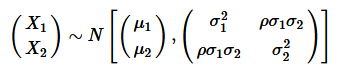

**Gaussian Mixture Model**

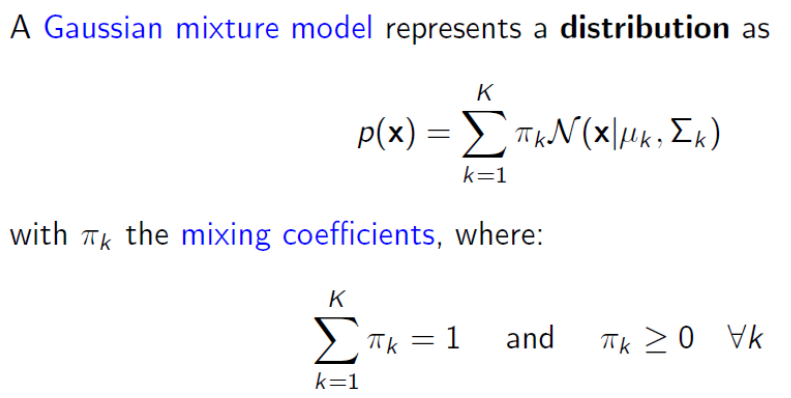

In [3]:
def gmm(x, p = 0):                                                              # Returns the PDF for Gaussian Mixture model of k Gaussians
  for i in range(k):
    p += np.exp(-np.dot(np.dot((x-mu[i]),np.linalg.inv(cov[i])),(x-mu[i]).T)/2.)/(2 * np.pi * np.linalg.det(cov[i])) #x, mean and cov, summing over K bi-variates
  return p/k

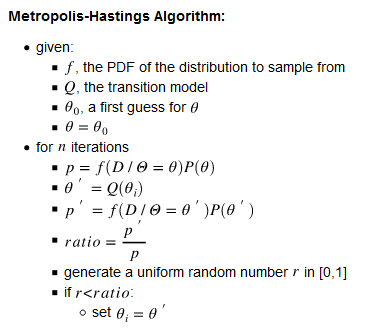

Following the above algorithm,

I have taken

> A multivariate gaussian distribution with initial guess [x,y] as the mean and sigma (mentioned in the question and provided by the user) as the cov mat

> Mixture of K-Gaussian Mixture Model's PDF as the model to sample from with mean as [2i,3i] and Cov as 0.5 * sqrt(i) * np.eye(2) for ith Gaussian of the K GMMs.

**Algorithm:**

> 1. Make an arbitary initial guess as [x,y] and provide it to Q as mean to make first guess and store it as cur_

> 2. Use cur_ as mean, and again provide it to Q to make the next probable guess as nxt_

> 3. Use them as X for the GMM to draw samples from and calculate the ratio **GMM(nex_)/GMM(cur_)** and if it is greater than 1, accept nxt_ and if it is less than 1 then generate a random number, compare and if it is greater than the random number ( sampled from ~U(0,1) ) accept nxt_ else iterate again for sampling.

> 4. Repeat the above steps until n samples are accepted and then return the list of accepted parameters.















In [4]:
def MHA(init_g, c = 1):
  arr = [] # To store the values of the sampled parameter
  cur_ = np.random.multivariate_normal(init_g, sigma * np.eye(2)) #sampling from a multivariate distribution 
  arr.append(cur_) #accept the 1st sample
  while(c<n):
    nxt_ = np.random.multivariate_normal(cur_, sigma * np.eye(2)) 
    if np.random.uniform(0,1) < (min(gmm(nxt_)/gmm(cur_),1)):
      cur_ = nxt_
      arr.append(cur_)
      c+=1
  return np.array(arr)

# **Inputs**

Provide the inputs for n, k and sigma to generate the plots

**Mean (mu)** = [2i, 3i] for the ith Gaussian

**Cov** = 0.5 * sqrt(i) * np.eye(2)

In [45]:
global n
global k
global sigma

n = int(input("Enter the number of samples you want to draw: "))
k = int(input("Enter the number of gaussians you want in the GMM: "))
sigma = float(input("Enter the value of sigma: "))

mu = [np.array([2*(i+1), 3*(i+1)]) for i in range(k)]
cov = [0.5*np.sqrt(i+1)*np.eye(2) for i in range(k)]

mu = np.array(mu)

Enter the number of samples you want to draw: 6000
Enter the number of gaussians you want in the GMM: 4
Enter the value of sigma: 2.5


# **Generate Plots**

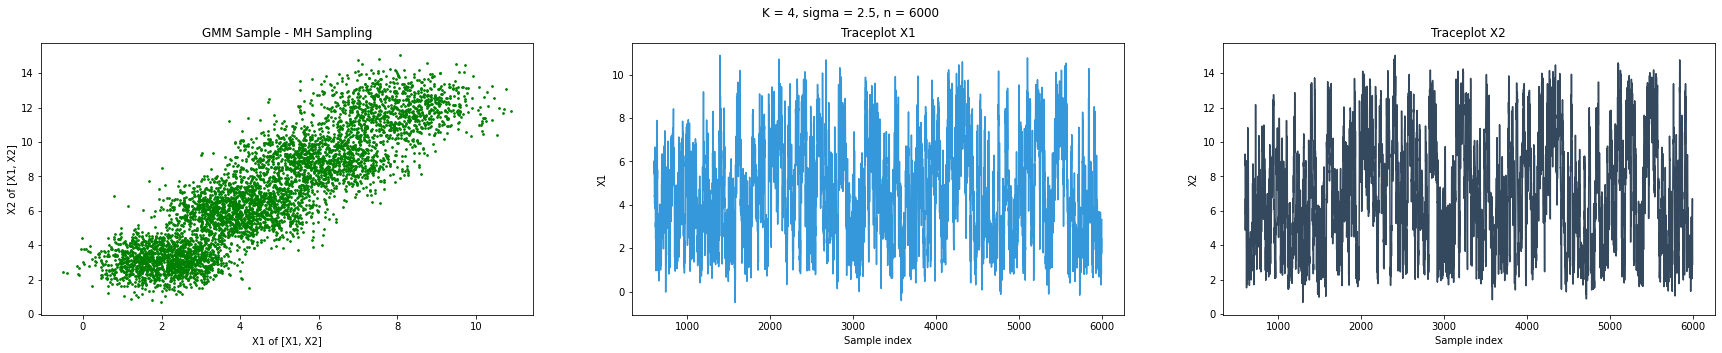

In [47]:
init_g = np.array([0.5,1.2])
data = MHA(init_g)
x = [i+1 for i in range(n)]

burn_in = 0.1
x = x[int(n*burn_in):]
data = data[int(n*burn_in):]

f, axarr = plt.subplots(nrows=1,ncols=3, figsize=[30,5])
f.suptitle('K = {}, sigma = {}, n = {}'.format(k, sigma, n))
plt.sca(axarr[0]);
plt.title('GMM Sample - MH Sampling')
plt.ylabel('X2 of [X1, X2]')
plt.xlabel('X1 of [X1, X2]')
plt.scatter(data[:,0],data[:,1], color='green', s=3.0)
plt.savefig('MHA_GMM.png')
plt.sca(axarr[1]); 
plt.title('Traceplot X1')
plt.ylabel('X1')
plt.xlabel('Sample index')
plt.plot(x, data[:,0], '#3498db')
plt.savefig('Trace_X1.png')
plt.sca(axarr[2]); 
plt.title('Traceplot X2')
plt.ylabel('X2')
plt.xlabel('Sample index')
plt.plot(x, data[:,1], '#34495e')
plt.savefig('Trace_X2.png')
plt.show()